In [10]:
train_data = pd.read_csv('./titanic_dataset/train.csv')

train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_data['Age'] = train_data['Age'].fillna(0)
train_data['Cabin'] = train_data['Cabin'].fillna(0)
train_data['Embarked'] = train_data['Embarked'].fillna(0)

In [6]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
X_train = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y_train = train_data['Survived']


Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       105
           1       0.69      0.70      0.70        74

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



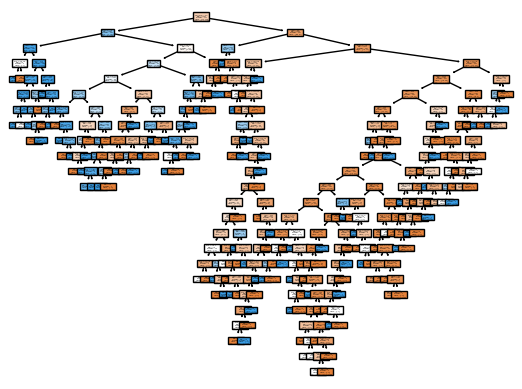

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('./titanic_dataset/train.csv')

X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

X = pd.get_dummies(X, columns=['Sex'], drop_first=True)


X['Age'].fillna(X['Age'].median(), inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


print('\nClassification Report:\n', classification_report(y_test, y_pred))


tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
